In [15]:
import pandas as pd
from prophet import Prophet

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.shape

(2905, 2)

In [17]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2905 non-null   object 
 1   y       2905 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB


In [19]:
p=Prophet()
p.fit(df)

15:36:23 - cmdstanpy - INFO - Chain [1] start processing
15:36:24 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future=p.make_future_dataframe(periods=365)
future.tail()


,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [21]:
forecast = p.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206964,7.540950,8.893260
3266,2017-01-16,8.531958,7.860762,9.284614
3267,2017-01-17,8.319376,7.588453,9.042624
3268,2017-01-18,8.151991,7.451922,8.902145
3269,2017-01-19,8.163908,7.461707,8.883094


In [22]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.0,3270.0,3270.0,3270.000000
mean,8.043354,7.432040,8.675769,8.029338,8.057224,0.009800,0.009800,0.009800,-0.000255,-0.000255,-0.000255,0.010055,0.010055,0.010055,0.0,0.0,0.0,8.053154
std,0.387188,0.718491,0.714055,0.416946,0.362679,0.614050,0.614050,0.614050,0.189717,0.189717,0.189717,0.583366,0.583366,0.583366,0.0,0.0,0.0,0.715977
min,7.184798,5.512517,6.796836,6.858111,7.475164,-1.238577,-1.238577,-1.238577,-0.311715,-0.311715,-0.311715,-0.926863,-0.926863,-0.926863,0.0,0.0,0.0,6.166632
25%,7.742562,6.886946,8.135509,7.742562,7.742562,-0.516064,-0.516064,-0.516064,-0.072268,-0.072268,-0.072268,-0.506178,-0.506178,-0.506178,0.0,0.0,0.0,7.514251
50%,8.157732,7.378919,8.629684,8.157732,8.157732,0.003117,0.003117,0.003117,-0.066661,-0.066661,-0.066661,-0.111410,-0.111410,-0.111410,0.0,0.0,0.0,8.004154
75%,8.288331,7.997188,9.230042,8.288331,8.288331,0.496741,0.496741,0.496741,0.119640,0.119640,0.119640,0.501871,0.501871,0.501871,0.0,0.0,0.0,8.610335
max,8.848545,9.640718,10.878302,8.848545,8.848545,1.467290,1.467290,1.467290,0.352285,0.352285,0.352285,1.115117,1.115117,1.115117,0.0,0.0,0.0,10.226336


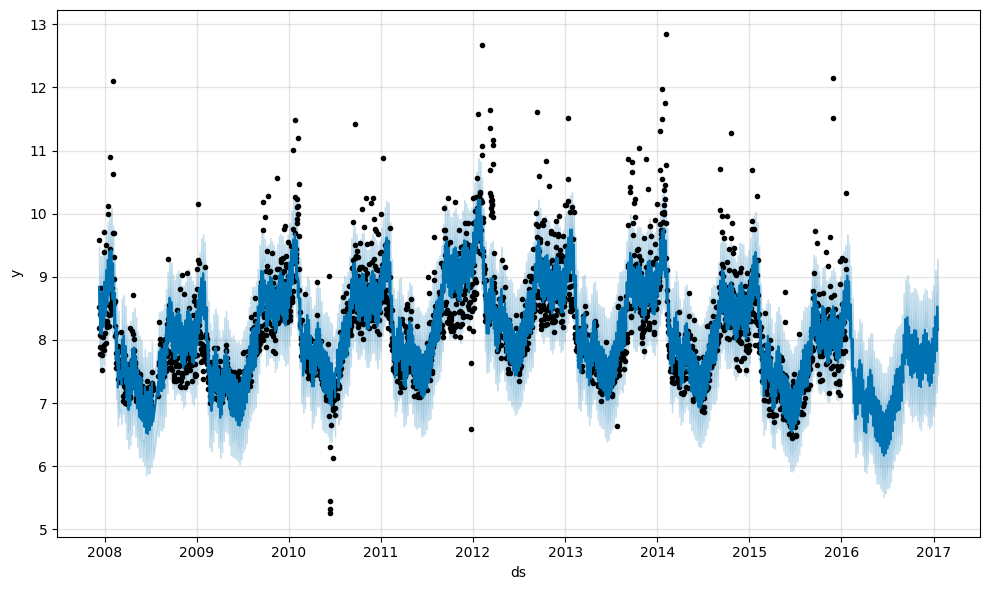

In [23]:
fig1 = p.plot(forecast)

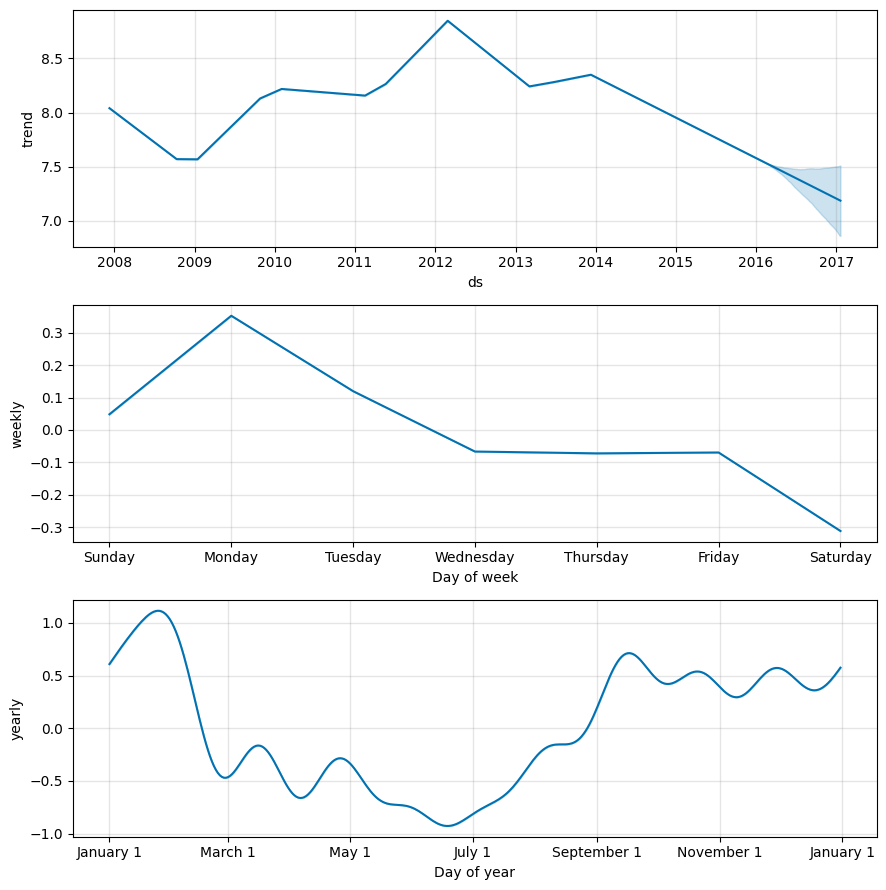

In [24]:
fig2 = p.plot_components(forecast)


In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.039995,8.240551,9.469716,8.039995,8.039995,0.803072,0.803072,0.803072,0.352285,0.352285,0.352285,0.450787,0.450787,0.450787,0.0,0.0,0.0,8.843067
1,2007-12-11,8.038455,7.968333,9.210179,8.038455,8.038455,0.553164,0.553164,0.553164,0.119640,0.119640,0.119640,0.433524,0.433524,0.433524,0.0,0.0,0.0,8.591619
2,2007-12-12,8.036915,7.810472,9.030472,8.036915,8.036915,0.350535,0.350535,0.350535,-0.066661,-0.066661,-0.066661,0.417196,0.417196,0.417196,0.0,0.0,0.0,8.387451
3,2007-12-13,8.035375,7.764699,8.973967,8.035375,8.035375,0.329980,0.329980,0.329980,-0.072268,-0.072268,-0.072268,0.402248,0.402248,0.402248,0.0,0.0,0.0,8.365355
4,2007-12-14,8.033835,7.661082,9.019987,8.033835,8.033835,0.319506,0.319506,0.319506,-0.069578,-0.069578,-0.069578,0.389085,0.389085,0.389085,0.0,0.0,0.0,8.353342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.188899,7.540950,8.893260,6.862585,7.507288,1.018065,1.018065,1.018065,0.048297,0.048297,0.048297,0.969768,0.969768,0.969768,0.0,0.0,0.0,8.206964
3266,2017-01-16,7.187874,7.860762,9.284614,6.861944,7.508022,1.344085,1.344085,1.344085,0.352285,0.352285,0.352285,0.991800,0.991800,0.991800,0.0,0.0,0.0,8.531958
3267,2017-01-17,7.186848,7.588453,9.042624,6.861400,7.509018,1.132527,1.132527,1.132527,0.119640,0.119640,0.119640,1.012887,1.012887,1.012887,0.0,0.0,0.0,8.319376
3268,2017-01-18,7.185823,7.451922,8.902145,6.860588,7.509976,0.966167,0.966167,0.966167,-0.066661,-0.066661,-0.066661,1.032828,1.032828,1.032828,0.0,0.0,0.0,8.151991


In [29]:
%store forecast

Stored 'forecast' (DataFrame)


In [28]:
from flask import Flask, jsonify, abort, request
# create an instance of the flask app
app = Flask(__name__)

"""@app.route('/')
def say_hello():
    return 'Hello, World!'"""


'''@app.route("/forecast", methods=["POST"])
def get_forecast():

    if not request.json or not 'days' in request.json:
        predictions = forecast()
    else:
        predictions = forecast(request.json['days'])

    if not predictions:
        abort(400, "Model not found.")

    return jsonify({"forecast": predictions})'''

@app.route("/", methods=["POST"])
def get_forecast():
    return forecast
    

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1